In [30]:
import pandas as pd
import numpy as np
import sys

from utils import *

target='top20'

df= pd.read_csv('../dataset/full_aggregated.csv',index_col=0)
df['top20'] = df['position'].apply(lambda x: 1 if x <= 0.162 else 0)
df = df.drop([
                'position',
                'is_tarmac',
                'day',
                'nationality', 
                'cyclist_id',
                '_url',
                'date',
                'cyclist_team', 
                'race_name',
                # 'month',
             ],axis=1)

cat_le=[
            'nationality', 
            'cyclist_id',
            '_url',
            'date',
            'cyclist_team', 
            'race_name',
            'month',
            'day',]
cat_le = [ x for x in cat_le if x in df.columns]
d=DataUtil(df, cat_le=cat_le,
        cat_oe=[
            'race_category'
        ],
        bins = [
            'top20'
        ])


train,valid,test=d.get_classic_numerical()
train.shape,valid.shape,test.shape

cats lb:  ['month']
cats oe:  ['race_category']
bins:  ['top20']
nums : ['points', 'length', 'cyclist_age', 'total_stages', 'num_races_in_category', 'stage', 'BSA', 'aug_profile', 'month_sine', 'month_cosine', 'nation_position_rolling_mean', 'nation_position_rolling_skew', 'race_cyclist_age_mean', 'race_cyclist_age_skew', 'race_BSA_mean', 'race_BSA_var', 'race_BSA_skew', 'cyclist_length_expanding_mean', 'cyclist_total_racers_expanding_mean', 'cyclist_race_delta_var_expanding_mean', 'cyclist_startlist_quality_expanding_mean', 'cyclist_aug_profile_expanding_mean', 'cyclist_delta_expanding_mean', 'cyclist_cyclist_points_expanding_mean', 'cyclist_position_expanding_mean', 'position_lag2', 'position_lag3', 'startlist_quality_lag3', 'aug_profile_lag2', 'aug_profile_lag3', 'cyclist_length_ema_cat', 'cyclist_total_racers_ema_cat', 'cyclist_aug_profile_ema_cat', 'cyclist_delta_ema_cat', 'cyclist_cyclist_points_ema_cat', 'cyclist_position_ema_cat']
Training set size: 307958
Validation set size: 

((307958, 41), (26779, 41), (31449, 41))

In [ ]:
# Display updated dtypes
print(train.dtypes)

In [36]:

from pycaret.classification import *
s = setup(train, 
          # remove_outliers=True,
          # fix_imbalance=True,
          # fix_imbalance_method="SMOTE",
          transformation=True,
          session_id = 13,
          target = 'top20',
          normalize=False,
          fold=5,
         )

In [3]:
get_config('X_transformed')

race_category_7_stages  race_category_classics  \
235438               -0.000000               -0.000000   
182574               -0.000000               -0.000000   
371668                0.201893               -0.000000   
95813                 0.201893               -0.000000   
362467               -0.000000                0.015395   
...                        ...                     ...   
353364               -0.000000               -0.000000   
199416               -0.000000               -0.000000   
189585               -0.000000               -0.000000   
33006                 0.201893               -0.000000   
250444               -0.000000               -0.000000   

        race_category_grand_tour  race_category_tour_de_france    points  \
235438                  0.591106                     -0.000000 -0.100951   
182574                 -0.000000                      0.178736  0.545689   
371668                 -0.000000                     -0.000000 -1.460407   
95813                  -0.000000                     -0.000000 -1.460407   
362467                 -0.000000                     -0.000000  1.044384   
...                          ...                           ...       ...   
353364                 -0.000000                      0.178736  0.495766   
199416                  0.591106                     -0.000000 -0.100951   
189585                  0.591106                     -0.000000  0.309549   
33006                  -0.000000                     -0.000000 -1.045325   
250444                 -0.000000                      0.178736  0.545689   

          length  cyclist_age  total_stages  num_races_in_category     stage  \
235438  0.120702     0.496665      0.932647              -0.815910 -1.189158   
182574 -0.227386    -0.822285      0.932647              -0.815910 -1.189158   
371668  0.226168    -1.440308     -0.666649              -1.489944  1.015992   
95813   0.120702     0.721491     -0.637936               0.009521 -0.877421   
362467  0.853160    -0.250870     -0.773417              -1.529528  1.562730   
...          ...          ...           ...                    ...       ...   
353364  1.691090     0.261542      0.932647              -0.633578 -0.114076   
199416  0.947982    -0.530074      1.328701              -0.129686 -0.197528   
189585 -0.087141     1.350290      0.332527               1.128440  1.199265   
33006   1.274223    -0.530074     -0.605678              -1.335740 -0.556256   
250444  0.714763     0.721491      0.932647               0.370685 -1.741488   

        ...  position_lag3  startlist_quality_lag3  aug_profile_lag2  \
235438  ...      -0.069009               -1.042799         -0.388293   
182574  ...       0.648405                1.134789         -0.078652   
371668  ...       0.065500                0.243943          0.499149   
95813   ...      -0.853683               -0.835887          0.161053   
362467  ...       0.455477               -1.260952         -0.314982   
...     ...            ...                     ...               ...   
353364  ...      -1.319891                1.021642          1.570420   
199416  ...       0.450602               -0.562571         -0.959569   
189585  ...       0.905832               -1.770979          0.384390   
33006   ...       1.653359               -0.181679         -0.943680   
250444  ...      -0.721541               -0.732666          0.159796   

        aug_profile_lag3  cyclist_length_ema_cat  \
235438         -0.284763               -0.114487   
182574         -1.644697                1.146755   
371668         -1.077354                2.493485   
95813          -1.266131               -1.438038   
362467         -0.308439                1.645412   
...                  ...                     ...   
353364          0.746678                0.395164   
199416         -0.402427               -0.720953   
189585         -0.758650                0.071363   
33006          -1.883507               -0.351852   


In [6]:
best = compare_models()


In [15]:
model = create_model('lr')

In [16]:
model.coef_


array([[-1.52421235e-01, -5.56904930e-03,  6.38220420e-02,
        -1.15685790e-01, -1.09300593e-01, -9.21014551e-03,
        -1.82219458e-01,  4.97360619e-02,  2.72335679e-02,
        -1.68112921e-02, -3.74419726e-02,  2.67614804e-03,
         2.34719026e-02, -1.62070394e-02,  1.54020060e-02,
         2.48355623e-03, -1.74886525e-02,  8.49049126e-05,
         2.01483281e-02,  2.55307560e-02,  2.29559013e-03,
        -5.95171021e-03,  1.22466294e-03, -7.52099230e-02,
         3.50206308e-02, -3.70617896e-02,  8.98652126e-02,
         6.44033193e-01, -1.59926159e-01, -3.09227985e-02,
        -4.64363677e-02, -4.99705614e-03, -6.10844323e-03,
         5.71619221e-03, -3.43552464e-02,  4.63109344e-02,
         7.61453467e-02, -1.66608457e-01,  3.42573510e-01,
        -4.56423683e-01]])

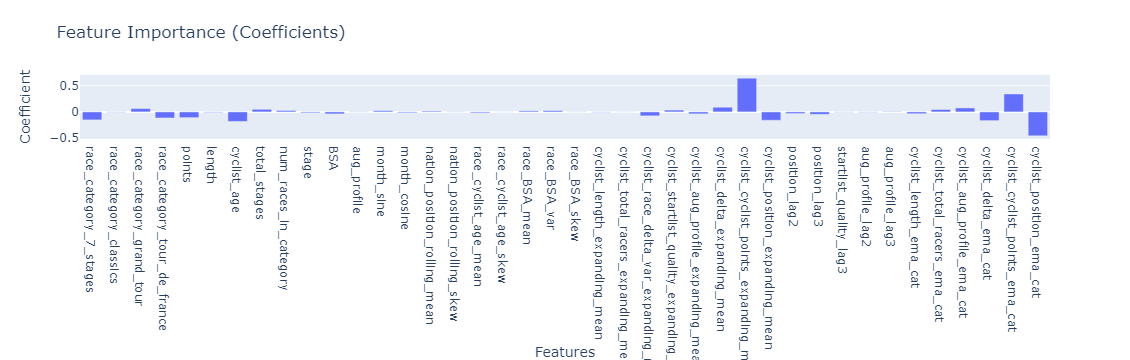

In [17]:
import plotly.express as px
import pandas as pd

# Remove 'top20' from the features list
features = [feature for feature in train.columns if feature != 'top20']

# Create a DataFrame for visualization
coefficients_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_.reshape(len(features))
})

# Plot interactive bar chart using Plotly
fig = px.bar(
    coefficients_df,
    x='Feature',
    y='Coefficient',
    title='Feature Importance (Coefficients)',
    labels={'Coefficient': 'Coefficient Value'},
    hover_data={'Feature': True, 'Coefficient': True},
    template='plotly'
)

# Customize the chart
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Coefficient",
    hovermode="x unified",
    bargap=0.2
)

# Show the interactive plot
fig.show()


In [37]:
model=create_model('xgboost',
                   # **best_params
                  )


In [6]:
model=tune_model(model,search_library='optuna')

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [33]:
pred = predict_model(model, data = valid)


In [14]:
best_params

{'max_depth': 28,
 'learning_rate': 0.07249482343407963,
 'n_estimators': 500,
 'gamma': 0.09328814196429873,
 'min_child_weight': 10,
 'subsample': 0.4588451716401948,
 'colsample_bytree': 0.607064251780013,
 'reg_alpha': 0.002642314168758673,
 'reg_lambda': 0.00035627107978280126}

Accuracy: 0.84
Precision: 0.53
Recall: 0.48
MCC: 0.41
ROC AUC: 0.70

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.91      0.91     22381
        True       0.53      0.48      0.50      4398

    accuracy                           0.84     26779
   macro avg       0.71      0.70      0.71     26779
weighted avg       0.84      0.84      0.84     26779



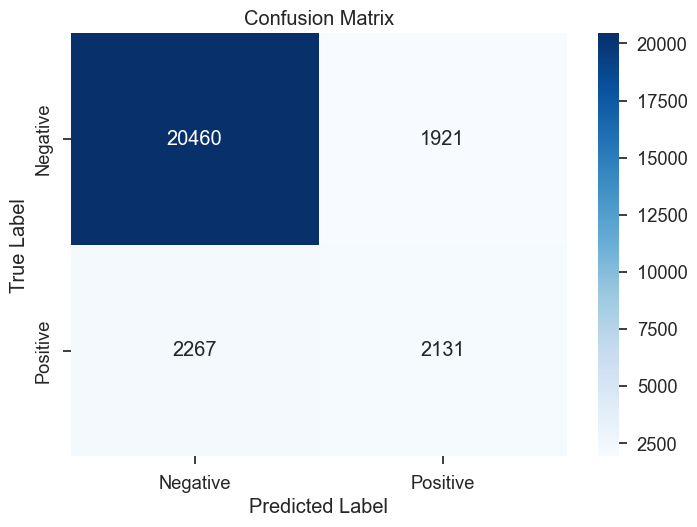

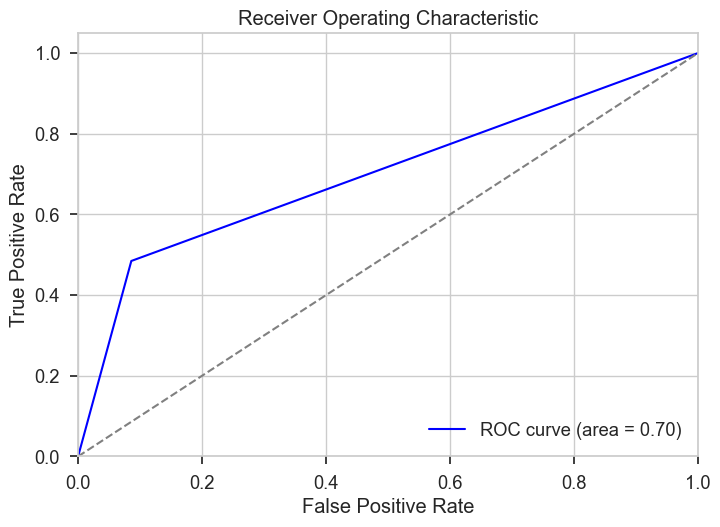

{'accuracy': 0.8436087979386833,
 'precision': 0.5259131293188549,
 'recall': 0.48453842655752616,
 'mcc': 0.41220675962679876,
 'roc_auc': 0.699353347142308,
 'classification_report': {'False': {'precision': 0.9002508030096361,
   'recall': 0.9141682677270899,
   'f1-score': 0.9071561585528066,
   'support': 22381.0},
  'True': {'precision': 0.5259131293188549,
   'recall': 0.48453842655752616,
   'f1-score': 0.504378698224852,
   'support': 4398.0},
  'accuracy': 0.8436087979386833,
  'macro avg': {'precision': 0.7130819661642456,
   'recall': 0.699353347142308,
   'f1-score': 0.7057674283888293,
   'support': 26779.0},
  'weighted avg': {'precision': 0.8387721410397321,
   'recall': 0.8436087979386833,
   'f1-score': 0.8410067403324719,
   'support': 26779.0}}}

In [34]:
evaluate_predictions(pred['prediction_label'], valid[target])

In [ ]:
optimize_threshold(model,optimize='f1')

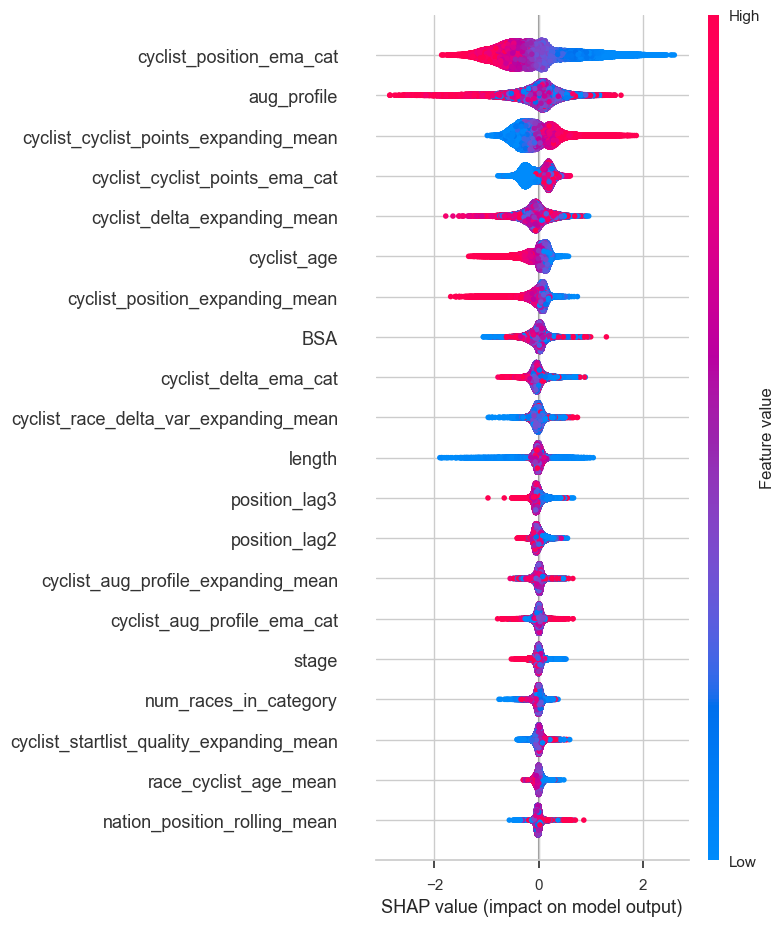

In [27]:
interpret_model(model)

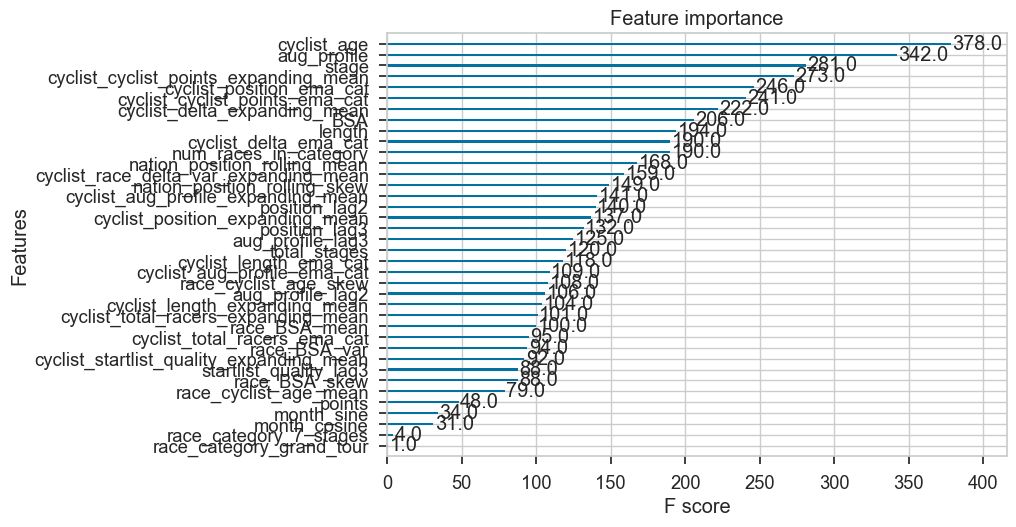

{'race_category_7_stages': 4.0, 'race_category_grand_tour': 1.0, 'points': 48.0, 'length': 194.0, 'cyclist_age': 378.0, 'total_stages': 120.0, 'num_races_in_category': 190.0, 'stage': 281.0, 'BSA': 206.0, 'aug_profile': 342.0, 'month_sine': 34.0, 'month_cosine': 31.0, 'nation_position_rolling_mean': 168.0, 'nation_position_rolling_skew': 149.0, 'race_cyclist_age_mean': 79.0, 'race_cyclist_age_skew': 108.0, 'race_BSA_mean': 100.0, 'race_BSA_var': 94.0, 'race_BSA_skew': 88.0, 'cyclist_length_expanding_mean': 104.0, 'cyclist_total_racers_expanding_mean': 101.0, 'cyclist_race_delta_var_expanding_mean': 159.0, 'cyclist_startlist_quality_expanding_mean': 92.0, 'cyclist_aug_profile_expanding_mean': 141.0, 'cyclist_delta_expanding_mean': 222.0, 'cyclist_cyclist_points_expanding_mean': 273.0, 'cyclist_position_expanding_mean': 137.0, 'position_lag2': 140.0, 'position_lag3': 132.0, 'startlist_quality_lag3': 88.0, 'aug_profile_lag2': 106.0, 'aug_profile_lag3': 125.0, 'cyclist_length_ema_cat': 118

In [35]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Suppose your trained model is called `model`
# and it is an xgboost.XGBClassifier or xgboost.XGBRegressor

# 1) Plot feature importance directly
xgb.plot_importance(model)
plt.show()

# If you want a table of importances:
importance_dict = model.get_booster().get_score(importance_type='weight')
print(importance_dict)

## XGBOOST

In [2]:
train,valid,test=d.get_decision_tree_data()

In [9]:
train.columns

Index(['top20', 'race_category_classic', 'race_category_monument',
       'race_category_regional_stage_race', 'race_category_world_championship',
       'race_category_world_tour_stage_race', 'points', 'length',
       'startlist_quality', 'cyclist_age', 'total_stages', 'total_racers',
       'stage', 'BSA', 'aug_profile', 'nation_position_rolling_mean',
       'nation_position_rolling_skew', 'stage_diversity_index_nationality',
       'cyclist_length_mean', 'cyclist_startlist_quality_mean',
       'cyclist_aug_profile_mean', 'cyclist_total_racers_mean',
       'cyclist_position_skew', 'cyclist_rolling_position_mean',
       'cyclist_rolling_delta_mean', 'cyclist_rolling_points_mean'],
      dtype='object')

In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import matthews_corrcoef, make_scorer, classification_report
import pandas as pd

X_train = train.drop(target,axis=1)
y_train = train[target]
# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False,
                          enable_categorical=True,
                          eval_metric='logloss')

# Define the parameter grid
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
    'min_child_weight': [1, 3, 5],
}

# Create a scorer for MCC
mcc_scorer = make_scorer(matthews_corrcoef)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=5,  # Number of random combinations to try
    scoring=mcc_scorer,
    cv=5,  # 5-fold cross-validation
    verbose=True,
    random_state=13,
    n_jobs=-1
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best MCC Score:", random_search.best_score_)





Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best MCC Score: 0.5420979716425126


Accuracy: 0.89
Precision: 0.74
Recall: 0.51
MCC: 0.56
ROC AUC: 0.74

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94     26105
        True       0.74      0.51      0.61      5152

    accuracy                           0.89     31257
   macro avg       0.83      0.74      0.77     31257
weighted avg       0.88      0.89      0.88     31257



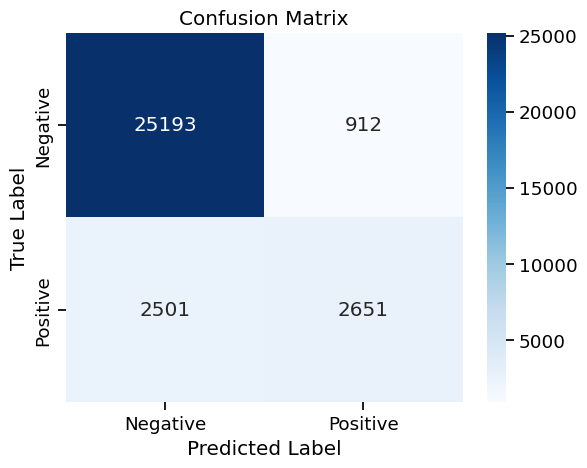

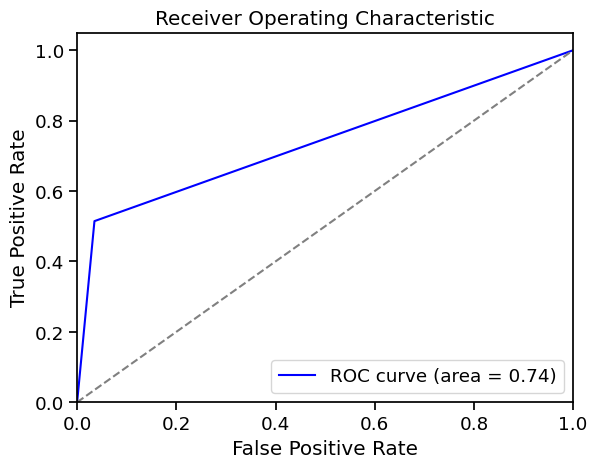

{'accuracy': 0.8908084589052052,
 'precision': 0.7440359247824867,
 'recall': 0.5145574534161491,
 'mcc': 0.5599480932395432,
 'roc_auc': 0.7398108086847073,
 'classification_report': {'False': {'precision': 0.9096916299559471,
   'recall': 0.9650641639532657,
   'f1-score': 0.9365601591107642,
   'support': 26105.0},
  'True': {'precision': 0.7440359247824867,
   'recall': 0.5145574534161491,
   'f1-score': 0.60837636259323,
   'support': 5152.0},
  'accuracy': 0.8908084589052052,
  'macro avg': {'precision': 0.8268637773692169,
   'recall': 0.7398108086847074,
   'f1-score': 0.772468260851997,
   'support': 31257.0},
  'weighted avg': {'precision': 0.8823870839965247,
   'recall': 0.8908084589052052,
   'f1-score': 0.8824665826428262,
   'support': 31257.0}}}

In [11]:
# Predict on the validation set
X_valid = valid.drop(target, axis=1)  # Replace 'target' with the actual target column name
y_valid = valid[target]

model = random_search.best_estimator_
y_pred = model.predict(X_valid)
evaluate_predictions(y_pred, valid[target])

In [6]:
import optuna
import numpy as np
import pandas as pd

from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
X=get_config('X_transformed')
y=get_config('y')
def objective(trial):

    
    # 3) XGBoost hyperparameters
    param = {
        "max_depth": trial.suggest_int("max_depth", 10, 30),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 700, step=50),
        "gamma": trial.suggest_float("gamma", 1e-8, 10.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.1, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        # For new XGBoost versions:
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }

    # 4) Build and evaluate the model
    model = XGBClassifier(**param)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring="matthews_corrcoef", n_jobs=-1)

    return scores.mean()

# ------------------ EXAMPLE USAGE ------------------
if __name__ == "__main__":
    # 1) Load or prepare your data: X, y (already split / scaled if needed).
    # For demo, let's create a random dataset:
    np.random.seed(13)
    
    # 2) Create the study and optimize
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)
    
    # 3) Print out the best results
    print("Best trial score:", study.best_trial.value)
    print("Best params:")
    for k, v in study.best_trial.params.items():
        print(f"  {k}: {v}")


[I 2025-01-05 22:27:54,571] A new study created in memory with name: no-name-1ebc9136-282d-4675-86fc-9eb5494fde0f
[I 2025-01-05 22:30:19,969] Trial 0 finished with value: 0.0 and parameters: {'max_depth': 21, 'learning_rate': 0.00024817254975509584, 'n_estimators': 650, 'gamma': 1.6092365109222974e-07, 'min_child_weight': 2, 'subsample': 0.1639621917610236, 'colsample_bytree': 0.4156858373226814, 'reg_alpha': 0.17392374583753847, 'reg_lambda': 6.465583661390398}. Best is trial 0 with value: 0.0.
[I 2025-01-05 22:32:17,702] Trial 1 finished with value: 0.026421284020931024 and parameters: {'max_depth': 27, 'learning_rate': 0.00090033246507775, 'n_estimators': 650, 'gamma': 1.0033343362011064e-05, 'min_child_weight': 9, 'subsample': 0.19753369944074028, 'colsample_bytree': 0.5657231489144655, 'reg_alpha': 1.2121090128102743, 'reg_lambda': 2.042031212560712e-07}. Best is trial 1 with value: 0.026421284020931024.
[I 2025-01-05 22:34:16,496] Trial 2 finished with value: 0.0 and parameters: 

Best trial score: 0.4213811567640028
Best params:
  max_depth: 28
  learning_rate: 0.07249482343407963
  n_estimators: 500
  gamma: 0.09328814196429873
  min_child_weight: 10
  subsample: 0.4588451716401948
  colsample_bytree: 0.607064251780013
  reg_alpha: 0.002642314168758673
  reg_lambda: 0.00035627107978280126


In [11]:
best_params=study.best_trial.params

100%|===================| 31237/31257 [11:32<00:00]        

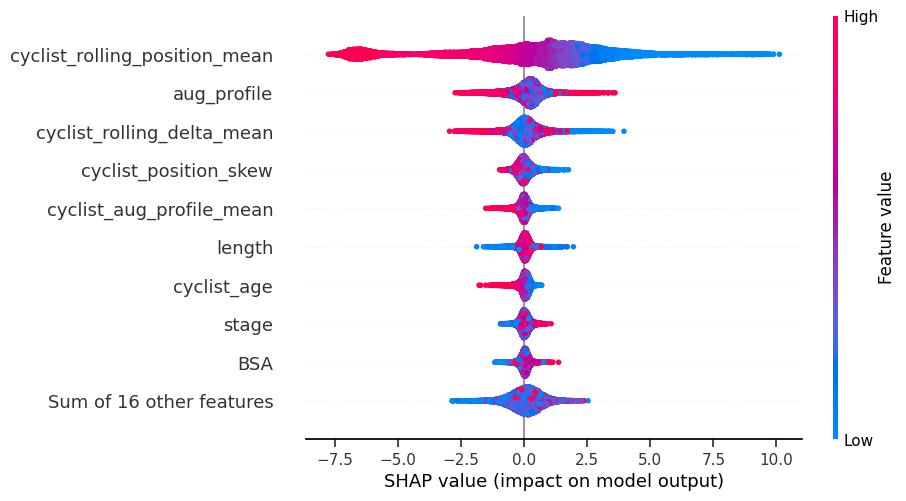

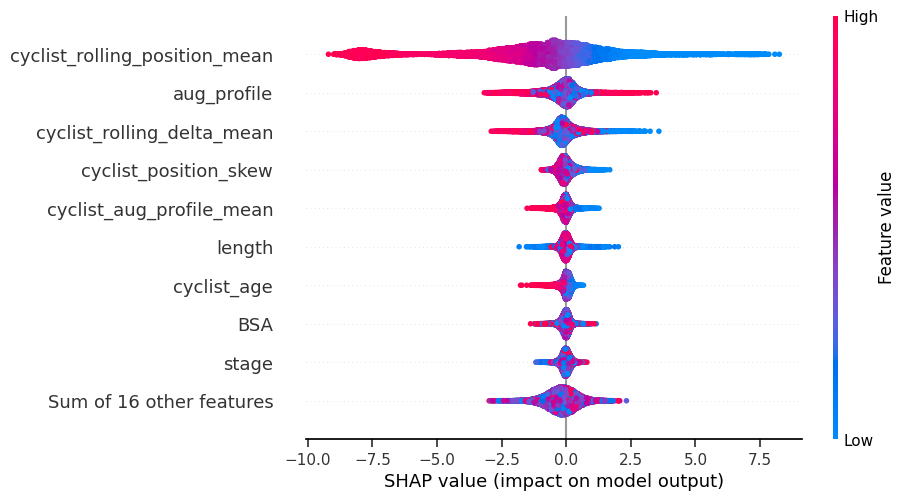

In [16]:
import shap

explanations={}

bool_columns = X_train.select_dtypes(include=['bool']).columns
X_train[bool_columns] = X_train[bool_columns].astype(int)

interventional_explanation_algorithm = shap.TreeExplainer(
    model=model,
    data=X_train,                       # perturb on a causal model induced on perturbation data
    feature_perturbation="interventional"  # use a causal model
)

distributional_explanation_algorithm = shap.TreeExplainer(
    model=model,
    feature_perturbation="tree_path_dependent"  # condition on the distribution learned on the train data
)
interventional_explanations = interventional_explanation_algorithm(X_valid)
distributional_explanations = distributional_explanation_algorithm(X_valid)

explanations["shap_interventional"] = interventional_explanations.values
explanations["shap_distributional"] = distributional_explanations.values

shap.plots.beeswarm(interventional_explanations)

shap.plots.beeswarm(distributional_explanations)


<Axes: ylabel='Density'>

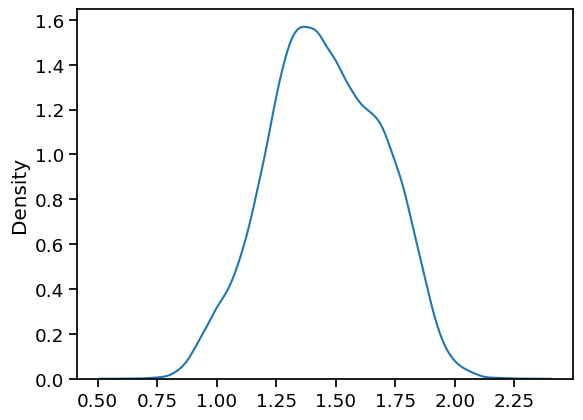

In [17]:
import seaborn


explanation_differences = interventional_explanations.values - distributional_explanations.values
scaling_value = max((abs(interventional_explanations.values).max(), abs(distributional_explanations.values).max()))
maximum_differences_per_instance = explanation_differences.max(axis=1)
maximum_differences_per_feature = explanation_differences.max(axis=0)


seaborn.kdeplot(maximum_differences_per_instance)


['race_category_classic', 'race_category_monument', 'race_category_regional_stage_race', 'race_category_world_championship', 'race_category_world_tour_stage_race', 'points', 'length', 'startlist_quality', 'cyclist_age', 'total_stages', 'total_racers', 'stage', 'BSA', 'aug_profile', 'nation_position_rolling_mean', 'nation_position_rolling_skew', 'stage_diversity_index_nationality', 'cyclist_length_mean', 'cyclist_startlist_quality_mean', 'cyclist_aug_profile_mean', 'cyclist_total_racers_mean', 'cyclist_position_skew', 'cyclist_rolling_position_mean', 'cyclist_rolling_delta_mean', 'cyclist_rolling_points_mean']


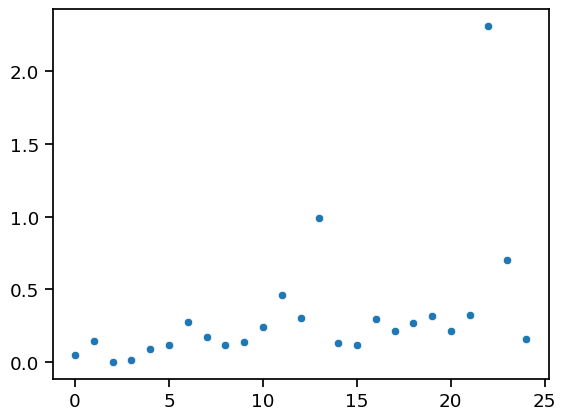

In [20]:
seaborn.scatterplot(maximum_differences_per_feature)
print(X_train.columns.tolist())

In [26]:
correlation_matrix = X_train.corr()
cycling_corr = correlation_matrix['cyclist_rolling_position_mean'].sort_values(ascending=False)
print(cycling_corr)

cyclist_rolling_position_mean          1.000000
cyclist_rolling_delta_mean             0.369344
nation_position_rolling_mean           0.193221
BSA                                    0.166518
cyclist_total_racers_mean              0.037907
total_racers                           0.013917
race_category_classic                  0.013125
cyclist_length_mean                    0.010714
points                                 0.005049
cyclist_rolling_points_mean            0.000629
stage_diversity_index_nationality      0.000525
nation_position_rolling_skew           0.000326
race_category_monument                 0.000209
race_category_world_championship      -0.000956
length                                -0.002615
race_category_world_tour_stage_race   -0.003283
total_stages                          -0.004293
startlist_quality                     -0.010941
aug_profile                           -0.011039
stage                                 -0.015123
cyclist_age                           -0

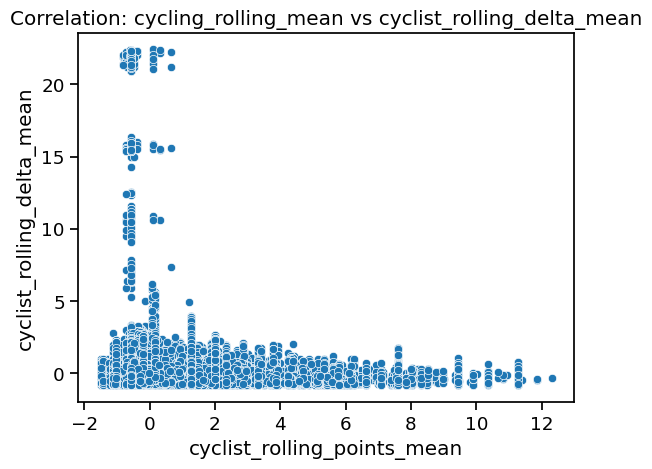

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with the top correlated feature
top_correlated_feature = cycling_corr.index[1]  # Skip 'cycling_rolling_mean' itself

sns.scatterplot(
    x=X_train['cyclist_rolling_points_mean'], 
    y=X_train[top_correlated_feature]
)
plt.title(f"Correlation: cycling_rolling_mean vs {top_correlated_feature}")
plt.show()


TypeError: Invalid object type at position 0

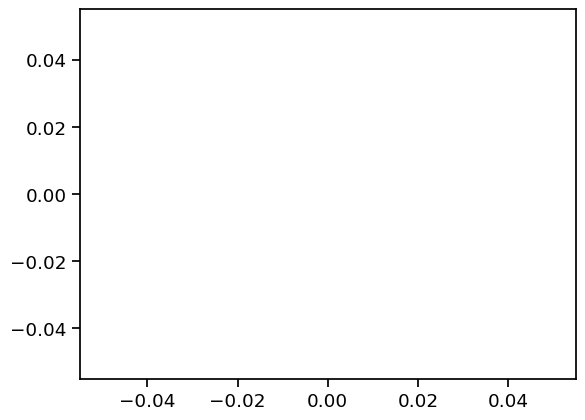

In [25]:
import shap

# Extract SHAP values for 'cycling_rolling_mean'
cycling_shap_interventional = interventional_explanations[:, X_train.columns.tolist().index('cyclist_rolling_points_mean')]
cycling_shap_distributional = distributional_explanations[:, X_train.columns.tolist().index('cyclist_rolling_points_mean')]

# Plot the difference
sns.histplot(cycling_shap_interventional - cycling_shap_distributional, kde=True)
plt.title("Difference in SHAP Values: cycling_rolling_mean")
plt.show()


In [33]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from interpret.blackbox import LimeTabular
from tqdm import tqdm
import numpy as np

# Convert categorical columns to label encoding
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
encoders = {}
for col in categorical_columns:
    encoders[col] = LabelEncoder()
    X_train[col] = encoders[col].fit_transform(X_train[col])


# XGBoost model training with the provided parameters
model = xgb.XGBClassifier(
    subsample=0.8,
    reg_lambda=1.5,
    reg_alpha=0.1,
    n_estimators=200,
    min_child_weight=3,
    max_depth=10,
    learning_rate=0.2,
    gamma=0.2,
    colsample_bytree=1.0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
model.fit(X_train, y_train)

# Automatically infer feature names and categorical indices for LIME
feature_names = X_train.columns.tolist()
categorical_features = [feature_names.index(col) for col in categorical_columns]
categorical_names = {
    feature_names.index(col): encoders[col].classes_.tolist()
    for col in categorical_columns
}



# Create LimeTabular explainer
explanation_algorithm = LimeTabular(
    model=model,
    data=X_train,
    feature_names=feature_names,
    categorical_features=categorical_features,
    categorical_names=categorical_names
)

# Generate explanations for a subset of data
explanations = {}
explanations["lime"] = np.array([
    np.array(e["scores"])
    for e in tqdm(explanation_algorithm.explain_local(X_train[:100], y_train[:100])._internal_obj["specific"])
])


100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


In [35]:
metric = "f1-score"
corruption_validation_lime = pd.DataFrame([
    (feature, noise_magnitude, validations_by_feature_and_noise[(feature, noise_magnitude)]["weighted avg"][metric], "lime")
    for feature, noise_magnitude in validations_by_feature_and_noise
    ],
    columns=["feature", "noise_magnitude", "performance", "algorithm"]
)
corruption_validation_lime["difference"] = corruption_validation_lime["performance"] - validation["weighted avg"][metric]

corruption_validation = pandas.concat((corruption_validation, corruption_validation_lime))
corruption_validation_lime

NameError: name 'validations_by_feature_and_noise' is not defined